Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

classes = {0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Functions for showing images

In [3]:
def show_im(index):
    image =np.array(train.loc[index][1:]).reshape(28,28)
    print(classes[train['label'][index]])
    print('label: ',train['label'][index])
    plt.imshow(image,cmap='Greys')
def show_im_test(index):
    image =np.array(test.loc[index][1:]).reshape(28,28)
    print(classes[test['label'][index]])
    print('label: ',test['label'][index])
    plt.imshow(image,cmap='Greys')

Creating model

In [6]:
model = keras.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

Training Model

In [8]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss = 'categorical_crossentropy',metrics=['accuracy','mse'])

In [9]:
X_train = train.drop('label',axis=1).values.reshape(train.shape[0],28,28,1)/255
y_train = train['label']

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [11]:
model.fit(X_train,y_train,epochs=15)

W0311 23:49:08.099970  1724 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\deep_tf2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 231us/sample - loss: 0.5236 - accuracy: 0.8038 - mse: 0.0269
Epoch 2/15
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3459 - accuracy: 0.8728 - mse: 0.0182
Epoch 3/15
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3008 - accuracy: 0.8878 - mse: 0.0160
Epoch 4/15
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2700 - accuracy: 0.8989 - mse: 0.0144
Epoch 5/15
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2519 - accuracy: 0.9062 - mse: 0.0135
Epoch 6/15
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2360 - accuracy: 0.9122 - mse: 0.0127
Epoch 7/15
60000/60000 [==============================] - 12s 203us/sample - loss: 0.2234 - accuracy: 0.9165 - mse: 0.0121
Epoch 8/15
60000/60000 [==============================] - 12s 208us/sample - loss: 0.2106 - accuracy: 0.9222 - mse: 

In [12]:
X_test = test.drop('label',axis=1).values.reshape(test.shape[0],28,28,1)/255
y_test = test['label']
#y_test = to_categorical(y_test)

Predicating test images

In [13]:
pred =model.predict_classes(X_test)

Coat
label:  4
4


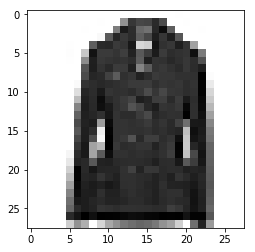

In [16]:
i = 1
show_im_test(i)
print(pred[i])

Train Evaluation

In [20]:
model.evaluate(X_train,y_train)

60000/60000 [==============================] - 5s 75us/sample - loss: 0.1216 - accuracy: 0.9548 - mse: 0.0067


[0.12162161289205153, 0.9548, 0.0066877594]

Test Evaluation

In [21]:
model.evaluate(X_test,to_categorical(y_test))

10000/10000 [==============================] - 1s 74us/sample - loss: 0.2345 - accuracy: 0.9202 - mse: 0.0118


[0.2345278542459011, 0.9202, 0.011773202]